### Assignment-1 functions:

* entropy(p: np.array) -> float
* get_image(url: str, local: Bool, greyscale: Bool) -> np.array
* normalized_histogram(img: np.array) -> np.array
* kl_divergence(p: np.array, q: np.array) -> float
* plot_kl_divergence_for_bernouli(r: float) -> s, D_pq, D_qp

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests

def entropy(p: np.array):
	"""
	Returns the entropy of a random variable X with probability mass function p.
	"""
	p = p[p > 0] # Remove all zero probabilities
	return -np.sum(p * np.log2(p))

def get_image(url: str, local = True, greyscale = False):
	"""
	Returns the image as an np.array from the given url.
	"""
	if local: img = Image.open(url)
	else: img = Image.open(requests.get(url, stream = True).raw)

	if greyscale: img = img.convert("L") # Convert to grayscale
	return np.array(img)

def normalized_histogram(img: np.array):
	"""
	Returns the normalized histogram of the given grayscale image.
	"""
	hist = np.zeros(256)
	for i in range(img.shape[0]):
		for j in range(img.shape[1]):
			hist[img[i][j]] += 1
	
	return hist / (img.shape[0] * img.shape[1]) # Normalize the histogram

def kl_divergence(p: np.array, q: np.array):
	"""
	Returns the KL divergence of the given probability mass functions.
	"""
	assert p.shape == q.shape, "The probability mass functions must have the same shape"
	# assert np.all((p > 0) == (q > 0))

	p[p == 0] = 1e-30
	q[q == 0] = 1e-30

	return np.sum(p * np.log2(p / q)) # Compute the KL divergence

def plot_kl_divergence_for_bernouli(r: float):
	"""
	Plots D(p||q) and D(q||p) for bernoili R.V.s p ~ Bern (r) and q ~ Bern (s), where r is fixed and s varies from 0 to 1.
	"""
	s = np.linspace(0.001, 0.999, 1001) # Probability of success for q

	p = np.array([r, 1 - r]) # Probability mass function for p
	q = np.array([np.array([s_i, 1 - s_i]) for s_i in s]) # Probability mass function for q (for each s

	# Compute the KL divergences
	D_pq = np.array([kl_divergence(p, q_i) for q_i in q])
	D_qp = np.array([kl_divergence(q_i, p) for q_i in q])

	# Plot the KL divergences
	plt.plot(s, D_pq, label = "D(p||q)")
	plt.plot(s, D_qp, label = "D(q||p)")
	plt.title(f"{r = :.2f}", fontsize = 16)
	plt.xlabel("s")
	plt.ylabel("KL divergence")
	plt.gca().axvline(r, ls='-.', label="r", color = "purple")
	plt.grid(True)
	plt.legend()

	return s, D_pq, D_qp

### Question 1: Distance between PDFs:


**Distance between PDFs:** In this question you will explore the other “distances” between PDFs discussed in class. To verify the implementation of these distances, use the normalized histogram of the stereo image pair (left.png, right.png) used in the previous assignment

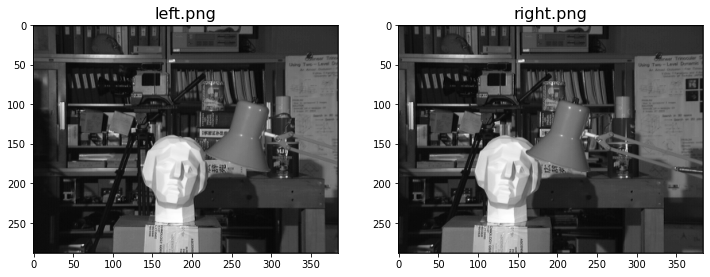

In [3]:
# Load the images
image_1 = get_image("left.png", greyscale = True)
image_2 = get_image("right.png", greyscale = True)

# Display the images
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.title("left.png", fontsize = 16)
plt.imshow(image_1, cmap = "gray")
plt.subplot(1, 2, 2)
plt.title("right.png", fontsize = 16)
plt.imshow(image_2, cmap = "gray")

# Compute the normalized histograms
hist_img1 = normalized_histogram(image_1)
hist_img2 = normalized_histogram(image_2)

#### **(a) Cross Entropy (CE):** 

The cross entropy between two PDFs (PMFs) $p$ and $q$ is given by: $H(p,q) = H(p) + D(p||q)$ where $H(p)$ is the entropy of $p$ and $D(p||q)$ is the KL divergence between $p$ and $q$. Write a function that accepts two PDFs (PMFs) $p$, $q$ and outputs the CE between them.


In [4]:
def cross_entropy(p: np.array, q: np.array):
	"""
	Returns the cross entropy H(p, q) = H(p) + D(p||q) of the given PMFs
	"""
	H_p = entropy(p)
	D_pq = kl_divergence(p, q)
	
	return H_p + D_pq

*(i)* Verify your function using the stereo image normalized histogram pair.

In [5]:
cross_entropy_studio = cross_entropy(hist_img1, hist_img2)
print(f"The cross entropy of the normalized histograms of the images left.png and right.png is H(p, q)\n\t = {cross_entropy_studio:.5f} bits")

The cross entropy of the normalized histograms of the images left.png and right.png is H(p, q)
	 = 7.27340 bits


*(ii)* As with the KL divergence problem, choose a fixed PMF $p ~ \text{ Bern}(s)$ where $s$ can be varied. Plot $H(p, q)$ as a function of $s$. From the plot, does minimizing $H(p, q)$ give us matched PMFs?

In [6]:
# Below code is modified code for the similar function from my assignment-1 submission
def plot_cross_entropy_for_bernouli(r: float):
	"""
	Plots H(p, q) for bernouli R.V.s p ~ Bern (r) and q ~ Bern (s), 
	where r is fixed and s varies from 0 to 1.
	"""
	s = np.linspace(0.001, 0.999, 1001) # Probability of success for q

	p = np.array([r, 1 - r]) # Probability mass function for p
	q = np.array([np.array([s_i, 1 - s_i]) for s_i in s]) # Probability mass function for q (for each s

	# Compute the cross entropy
	H_pq = np.array([cross_entropy(p, q_i) for q_i in q])

	# Plot the cross_entropy
	plt.plot(s, H_pq, label = "H(p, q)")
	plt.title(f"{r = :.2f}", fontsize = 16)
	plt.xlabel("s")
	plt.ylabel("Cross entropy")
	plt.gca().axvline(r, ls='-.', label="r", color = "purple")
	plt.grid(True)
	plt.legend()

	return s, H_pq

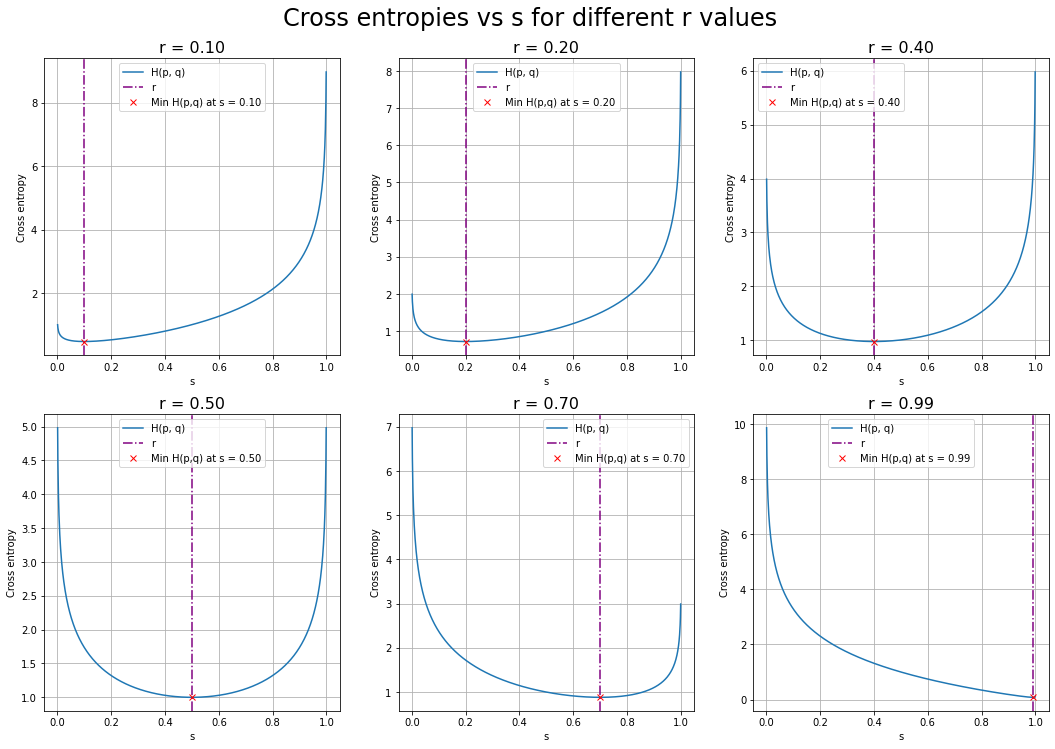

In [7]:
test_rs = [0.1, 0.2, 0.4, 0.5, 0.7, 0.99]
eps = 1e-3 # Tolerance for floating point comparisons

# Plot the cross entropies for the given test r values
plt.figure(figsize = (18, 12))
plt.suptitle("Cross entropies vs s for different r values", fontsize = 24, y = 0.94)
for r, subplot in zip(test_rs, range(1, 7)):
	plt.subplot(2, 3, subplot)

	s, H_pq = plot_cross_entropy_for_bernouli(r)

	# Mark the minimum cross entropy
	min_H_pq = np.min(H_pq)
	min_s = s[np.argmin(H_pq)]
	plt.plot(min_s, min_H_pq, "rx", label = f"Min H(p,q) at s = {min_s:.2f}")
	plt.legend()

plt.show()

From these plots, we can see that when the cross entropy is minimized, $s = r$, i.e. the PMFs are matched.

#### **(b) Jensen-Shannon (JS) Divergence:**

The definition of JS divergence between two PDFs $p$ and $q$ is given by: $J(p, q) = D(p||m) + D(q||m)$ where $m = \frac{p + q}{2}$ and $D(p||q)$ is the KL divergence between $p$ and $q$. Write a function that accepts two PDFs (PMFs) $p$, $q$ and outputs the JS divergence between them. Verify that the $JS(p, q)$ is symmetric indeed while $D(p||q)$ is not. Again, use the normalized histograms of the stereo image pair.

In [8]:
def js_divergence(p: np.array, q: np.array):
	"""
	Returns the JS divergence of the given pmfs.
	"""
	m = (p + q) / 2 # Compute the mean probability mass function

	return (kl_divergence(p, m) + kl_divergence(q, m))

In [9]:
js_divergence_pq = js_divergence(hist_img1, hist_img2)
js_divergence_qp = js_divergence(hist_img2, hist_img1)

print(f"The JS divergence of the normalized histograms of the images left.png and right.png is given by\n\t {js_divergence_pq = :.8f} bits\n\t {js_divergence_qp = :.8f} bits\n")

assert np.abs(js_divergence_pq - js_divergence_qp) < eps, "The JS divergence is not symmetric"

print(f"As we can see, the JS divergence is symmetric, i.e J(p, q) = J(q, p)\n")

kl_divergence_pq = kl_divergence(hist_img1, hist_img2)
kl_divergence_qp = kl_divergence(hist_img2, hist_img1)
print(f"However, the KL divergence is not symmetric, i.e D(p, q) != D(q, p)\n\t {kl_divergence_pq = :.8f} bits\n\t {kl_divergence_qp = :.8f} bits")

The JS divergence of the normalized histograms of the images left.png and right.png is given by
	 js_divergence_pq = 0.00734608 bits
	 js_divergence_qp = 0.00734608 bits

As we can see, the JS divergence is symmetric, i.e J(p, q) = J(q, p)

However, the KL divergence is not symmetric, i.e D(p, q) != D(q, p)
	 kl_divergence_pq = 0.01510402 bits
	 kl_divergence_qp = 0.01440979 bits


#### **(c) Wasserstein Distance:**

The Wasserstein-1 distance between two PDFs $r$ and $s$ is given by: $W_1(r, s) = \inf_{\pi \in \Pi(r, s)} E_{(x, y) \sim \pi} |x - y|$. The set $\Pi(r, s)$ is composed of all bivariate joint PDFs whose marginals equal $r$ and $s$. Given a tuple $(p_{(X, Y)}, r_X, s_Y)$ of a joint histogram $p_{(X, Y)}$, and marginals $r_X$, $s_Y$, write a function that accepts this tuple and checks if $p_{X,Y} \in \Pi(r, s)$. Verify your function with a positive example and a negative example.

In [10]:
def is_in_Pi_rs(p_XY: np.array, r: np.array, s: np.array, eps = 1e-6):
	"""
	Returns true if the given joint pmf p_XY is in Pi_rs, else false.
	"""
	assert p_XY.shape[0] == r.shape[0], "The number of rows in p_XY must be equal to the length of r"
	assert p_XY.shape[1] == s.shape[0], "The number of columns in p_XY must be equal to the length of s"
	
	# Compute the marginal pmfs p_X and p_Y
	p_X = np.sum(p_XY, axis = 1)
	p_Y = np.sum(p_XY, axis = 0) 

	# Check if the marginal pmfs are equal to r and s respectively
	if not np.all(np.abs(p_X - r) < eps): return False, p_X, p_Y
	if not np.all(np.abs(p_Y - s) < eps): return False, p_X, p_Y

	return True

In [11]:
# Positive Example
r = np.array([0.5, 0.2, 0.3])
s = np.array([0.4, 0.6])
p_XY = np.array([[0.2, 0.3], [0.08, 0.12], [0.12, 0.18]])

print(f"Is the given joint pmf in Pi_rs?\n\t{is_in_Pi_rs(p_XY, r, s)}")


Is the given joint pmf in Pi_rs?
	True


In [12]:
# Negative Example
r = np.array([0.5, 0.2, 0.3])
s = np.array([0.4, 0.6])
p_XY = np.array([[0.3, 0.2], [0.12, 0.08], [0.18, 0.12]])

print(f"Is the given joint pmf in Pi_rs?\n\t{is_in_Pi_rs(p_XY, r, s)}")

Is the given joint pmf in Pi_rs?
	(False, array([0.5, 0.2, 0.3]), array([0.6, 0.4]))


### Question 2: Visualizing Data Using t-SNE:

#### **(a) t-SNE paper Q&A**

*(i)* What is the crowding problem?

The crowding problem arises because in the higher dimensional space, the number of possible points at a certain distance scales exponentially with the dimensionality. This causes the points to be crowded together in the lower dimensional space if we try to faithfully model such equidistant points in the higher dimensional space. i.e. the space on the map for data that is moderately far away won't be nearly as big as the space for data that's close by.

*(ii)* How does the choice of the Student t-distribution in the low dimensional embedding spacehelp address the crowding problem?

The Student-t distribution is a heavy-tailed distribution, which means that it has a higher probability of generating points that are far away from the mean as compared to a Gaussian distribution. This feature of the Student-t distribution intrinsically helps in addressing the crowding problem, as it allows the moderately far away points to be placed further apart in the lower dimensional space, thus reducing the crowding. Another convenient feature of the Student-t distribution with a single degree of freedom is that $(1 + ||y_i − y_j||^2)^{−1}$ approaches an inverse square law for large pairwise distances, making the mapping invarient to changes in scale for the map points that are far apart.

*(iii)* What other important changes have been made in t-SNE relative to SNE?

t-SNE has two important changes relative to SNE that helps alleviate both the crowding problem and the optimization problems of SNE.

1) It uses a Student-t distribution instead of a Gaussian distribution in the low dimensional space. This helps in alleviating the crowding problem as discussed above.
2) It uses a symmetrized version of the SNE cost function with simpler gradients. This helps in alleviating the optimization problems of SNE.

#### **(b) Algorithm-1 Implementation**

* Generate two clusters of points from a ten-dimensional multivariate Gaussian (MVG) distribution $\mathcal{N}(\mu, 0.01 \cdot I)$ where $I$ is the ten-dimensional identity matrix.
* Use $\mu_1 = 1$ for one cluster and $\mu_2 = 10 \cdot 1$ for the other (where $1$ is the ten-dimensional vector of ones).
* Generate $10$ points from each cluster for a total of $20$ points to form the set $\mathcal{X}$.
* Choose the dimension of the embedding to be two.
* Choose $T = 50$.
* Experiment with different choices for $\eta$ and $\alpha(t)$. For simplicity, let $\alpha(t)$ not change with iterations.
* Use your knowledge of how $\mathcal{X}$ was generated for choices of $\sigma_i$ (as opposed to finding them using the user-defined Perplexity).
* Plot the points in $\mathcal{Y}$ at the beginning and at the end of $50$ iterations. Print your observations from the plots.
* Find and print $D(P||Q)$ at the beginning and at the end of $50$ iterations. Print your observations from these values.

In [13]:
# Generating our high dimensional input data (2 gaussian clusters in 10 dimensions)
dim_x = 10
mu_1 = np.ones(dim_x)
mu_2 = 10 * np.ones(dim_x)
cov = 0.01 * np.eye(dim_x)

n = 20
X_1 = np.random.multivariate_normal(mu_1, cov, n)
X_2 = np.random.multivariate_normal(mu_2, cov, n)
X = np.concatenate((X_1, X_2))

In [14]:
def Pij(X: np.array, Perp: float = None):
	"""
	Returns the symmetric Pij for the given input data X.
	"""
	n = X.shape[0]
	P = np.zeros((n, n))

	# Ideally to get the best sigma, we should do binary search on sigma to get the given perplexity value
	def sigma_i(i: int):
		return 0.1

	# Compute the conditional pmfs Pj|i
	for i in range(n):
		sigma_i = 0.125 # sigma_i(i)
		for j in range(n):
			if i == j: continue
			P[i][j] = np.exp(-np.linalg.norm(X[i] - X[j]) ** 2 / (2 * sigma_i ** 2))
		P[i] /= np.sum(P[i]) # Normalize the conditional pmf

	# Compute the symmetric joint pmf P
	P = (P + P.T) / (2 * n)

	return P	

In [15]:
def student_t_dist(Y: np.array):
	"""
	Returns the student-t distribution for the given input data Y.
	"""
	n = Y.shape[0]
	Qij = np.zeros((n, n))

	# Compute the distribution Qij
	for i in range(n):
		for j in range(n):
			if i == j: continue
			Qij[i][j] = 1 / (1 + np.linalg.norm(Y[i] - Y[j]) ** 2)
	
	# Normalize the distribution Qij
	Qij /= np.sum(Qij)

	return Qij

In [16]:
# Algorithm 1: t-SNE
def t_SNE(X: np.array, dim_y: int, T: int = 1000, eta: float = 10, alpha: float = 0.5, Perp: float = None, Y0: np.array = None):
	"""
	Returns the low dimensional representation of the given input data X initially and after the optimization using t-SNE.
	"""
	n = X.shape[0]

	# Compute the symmetric joint pmf P
	P = Pij(X, Perp)

	# Initialize the low dimensional representation Y
	if Y0 is None: 
		Y0 = np.random.multivariate_normal(np.zeros(dim_y), 1e-4 * np.eye(dim_y), n)
	Y = Y0.copy()
	Y_history = [Y.copy()]

	# Run the gradient descent algorithm
	for t in range(T):
		# Compute the student-t distribution Qij
		Q = student_t_dist(Y)

		# Compute the gradient of the KL divergence
		grad = np.zeros((n, dim_y))
		for i in range(n):
			for j in range(n):
				grad[i] += 4 * (P[i][j] - Q[i][j]) * (Y[i] - Y[j]) * (1 + np.linalg.norm(Y[i] - Y[j]) ** 2) ** -1

		# Descend along the gradient
		Y -= eta * grad

		# Apply momentum
		if t > 1: 
			Y += alpha * (Y_history[-1] - Y_history[-2])

		Y_history.append(Y.copy())
		if t == T//2: Yt = Y.copy()

	return Y0, Yt, Y


Low learning rate and no momentum. We can see it takes a long time to converge


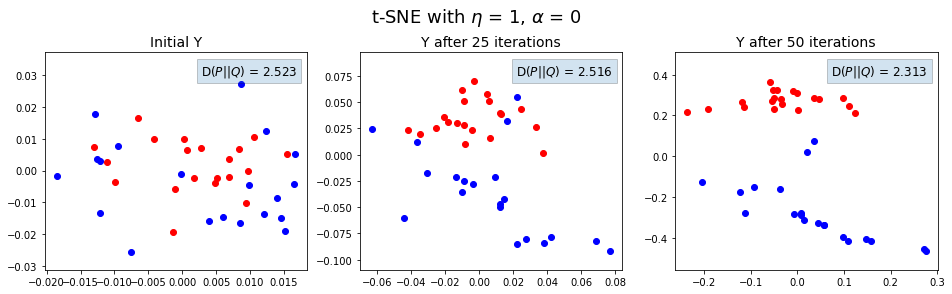


Higher learning rate and no momentum. We can see it converges faster than the previous case


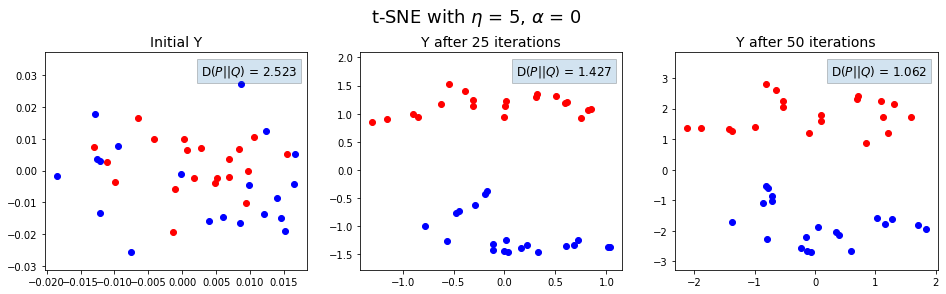


We can see that the momentum helps in converging faster


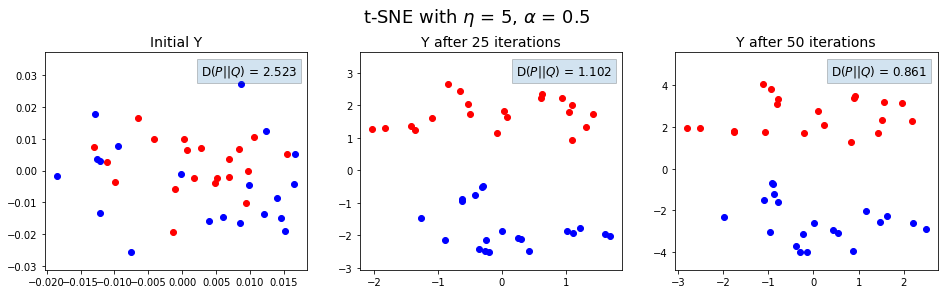


Alpha upto one helps in converging faster


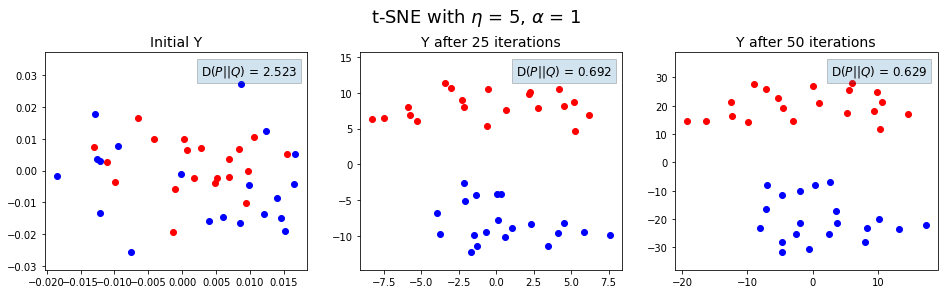


Greater than 1 alphas coz it to diverge


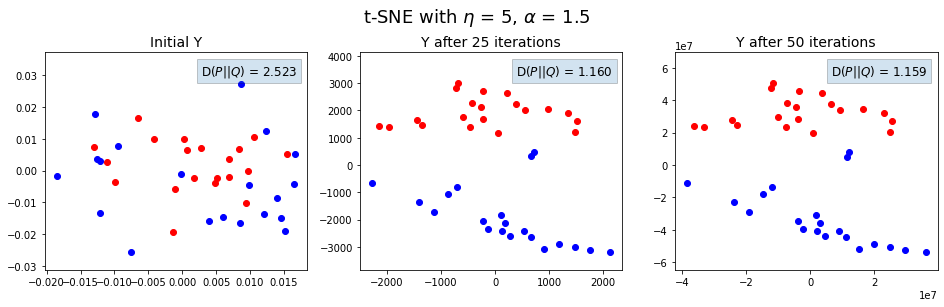


These values are pretty good for this dataset


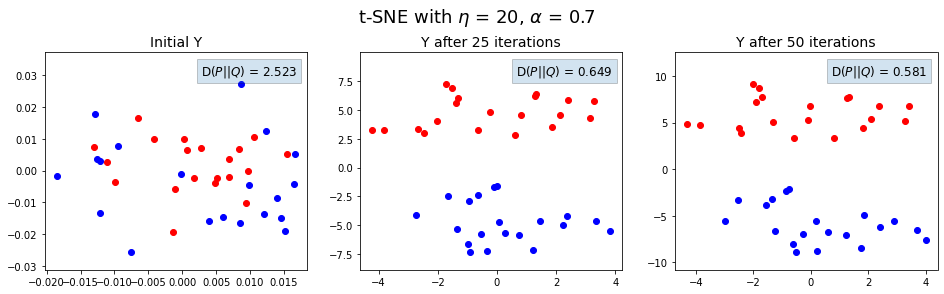


Too high learning rate causes it to diverge


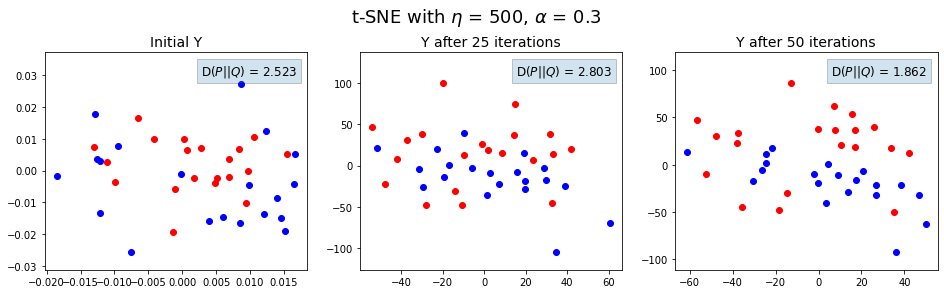

In [17]:
# Running t-SNE on our input data
T = 50
dim_y = 2
test_learning_rates = [1, 5,   5, 5,   5,  20, 500]
test_alphas = 		  [0, 0, 0.5, 1, 1.5, 0.7,  0.3]
comments = ["Low learning rate and no momentum. We can see it takes a long time to converge", 
			"Higher learning rate and no momentum. We can see it converges faster than the previous case",
			"We can see that the momentum helps in converging faster",
			"Alpha upto one helps in converging faster",
			"Greater than 1 alphas coz it to diverge",
			"These values are pretty good for this dataset",
			"Too high learning rate causes it to diverge"]

P = Pij(X)
Y_0 = np.random.multivariate_normal(np.zeros(dim_y), 1e-4 * np.eye(dim_y), X.shape[0])

for lr, alpha, comment in zip(test_learning_rates, test_alphas, comments):
	print("\n"+comment)
	# Run t-SNE
	Y0, Yt, Y = t_SNE(X, dim_y, T, eta = lr, alpha = alpha, Y0 = Y_0)

	# Plot the results
	plt.figure(figsize = (16, 4))
	plt.suptitle(f"t-SNE with $\eta$ = {lr}, $\\alpha$ = {alpha}", fontsize = 18, y = 1.04)

	# Initial Y
	plt.subplot(1, 3, 1)
	plt.title("Initial Y", fontsize = 14)
	plt.scatter(Y0[:n, 0], Y0[:n, 1], label = "$\sim \mathcal{N}_{10}(\mu_1, \sigma^2)$", color = "blue")
	plt.scatter(Y0[n:, 0], Y0[n:, 1], label = "$\sim \mathcal{N}_{10}(\mu_2, \sigma^2)$", color = "red")
	plt.ylim(plt.ylim()[0] * 1.1, plt.ylim()[1] * 1.25)
	Cost = kl_divergence(P, student_t_dist(Y0))
	plt.text(0.595, 0.9, f"D($P || Q$) = {Cost:.3f}", fontsize = 12, transform = plt.gca().transAxes, bbox = dict(facecolor = "C0", alpha = 0.2))

	# Y after T/2 iterations
	plt.subplot(1, 3, 2)
	plt.title(f"Y after {T//2} iterations", fontsize = 14)
	plt.scatter(Yt[:n, 0], Yt[:n, 1], label = "$\sim \mathcal{N}_{10}(\mu_1, \sigma^2)$", color = "blue")
	plt.scatter(Yt[n:, 0], Yt[n:, 1], label = "$\sim \mathcal{N}_{10}(\mu_2, \sigma^2)$", color = "red")
	plt.ylim(plt.ylim()[0] * 1.1, plt.ylim()[1] * 1.25)
	Cost = kl_divergence(P, student_t_dist(Yt))
	plt.text(0.595, 0.9, f"D($P || Q$) = {Cost:.3f}", fontsize = 12, transform = plt.gca().transAxes, bbox = dict(facecolor = "C0", alpha = 0.2))

	# Final Y
	plt.subplot(1, 3, 3)
	plt.title(f"Y after {T} iterations", fontsize = 14)
	plt.scatter(Y[:n, 0], Y[:n, 1], label = "$\sim \mathcal{N}_{10}(\mu_1, \sigma^2)$", color = "blue")
	plt.scatter(Y[n:, 0], Y[n:, 1], label = "$\sim \mathcal{N}_{10}(\mu_2, \sigma^2)$", color = "red")
	plt.ylim(plt.ylim()[0] * 1.1, plt.ylim()[1] * 1.25)
	Cost = kl_divergence(P, student_t_dist(Y))
	plt.text(0.595, 0.9, f"D($P || Q$) = {Cost:.3f}", fontsize = 12, transform = plt.gca().transAxes, bbox = dict(facecolor = "C0", alpha = 0.2))

	plt.show()


#### **(c) Built in t-SNE utility**

Now, experiment with the built-in t-SNE utility in matplotlib. Choose four different perplexity values (between 5 and 50) and generate t-SNE plots for these choices. How does perplexity affect the plots?


For low perplexities, since the input clusters are well separated, the output also has well separated clusters. However the cluster is spead out and not compact


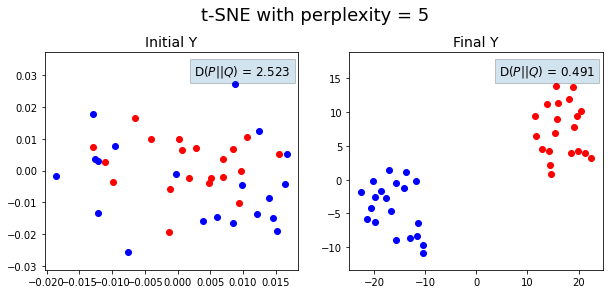


When the perplexity is around half the cluster size, we get more compact clusters, while still preserving some more local feautures


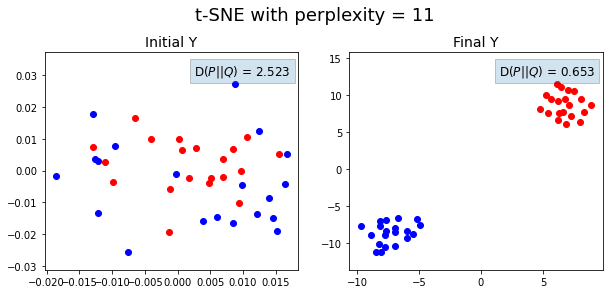


When the perplexity is equal to the cluster size, we get the most compact clusters, as all points in a cluster and are considered to be equidistant to each other


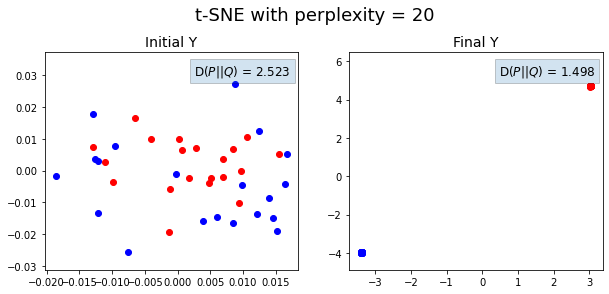


When the perplexity approaches the number of points, all points are considered to be equidistant to each other and our clustering breaks down


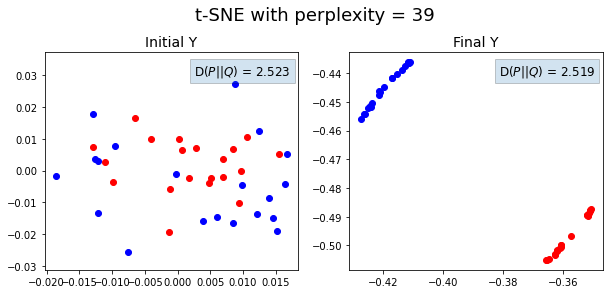

In [18]:
from sklearn.manifold import TSNE

test_perplexities = [5, 1+n//2, n, min(2*n-1, 50)]
Comments = ["For low perplexities, since the input clusters are well separated, the output also has well separated clusters. However the cluster is spead out and not compact",
			"When the perplexity is around half the cluster size, we get more compact clusters, while still preserving some more local feautures",
			"When the perplexity is equal to the cluster size, we get the most compact clusters, as all points in a cluster and are considered to be equidistant to each other",
			"When the perplexity approaches the number of points, all points are considered to be equidistant to each other and our clustering breaks down"]

for perplexity, comment in zip(test_perplexities, Comments):
	print("\n"+comment)
	Y = TSNE(n_components=dim_y, perplexity=perplexity, early_exaggeration=12.0, learning_rate=20, n_iter=500, init=Y_0).fit_transform(X)

	# Plot the results
	plt.figure(figsize = (10, 4))
	plt.suptitle(f"t-SNE with perplexity = {perplexity}", fontsize = 18, y = 1.04)

	# Initial Y
	plt.subplot(1, 2, 1)
	plt.title("Initial Y", fontsize = 14)
	plt.scatter(Y0[:n, 0], Y0[:n, 1], label = "$\sim \mathcal{N}_{10}(\mu_1, \sigma^2)$", color = "blue")
	plt.scatter(Y0[n:, 0], Y0[n:, 1], label = "$\sim \mathcal{N}_{10}(\mu_2, \sigma^2)$", color = "red")
	plt.ylim(plt.ylim()[0] * 1.1, plt.ylim()[1] * 1.25)
	Cost = kl_divergence(P, student_t_dist(Y0))
	plt.text(0.59, 0.9, f"D($P || Q$) = {Cost:.3f}", fontsize = 12, transform = plt.gca().transAxes, bbox = dict(facecolor = "C0", alpha = 0.2))

	# Final Y
	plt.subplot(1, 2, 2)
	plt.title(f"Final Y", fontsize = 14)
	plt.scatter(Y[:n, 0], Y[:n, 1], label = "$\sim \mathcal{N}_{10}(\mu_1, \sigma^2)$", color = "blue")
	plt.scatter(Y[n:, 0], Y[n:, 1], label = "$\sim \mathcal{N}_{10}(\mu_2, \sigma^2)$", color = "red")
	if perplexity != test_perplexities[-1]: 
		plt.ylim(plt.ylim()[0] * 1.1, plt.ylim()[1] * 1.25)
	Cost = kl_divergence(P, student_t_dist(Y))
	plt.text(0.59, 0.9, f"D($P || Q$) = {Cost:.3f}", fontsize = 12, transform = plt.gca().transAxes, bbox = dict(facecolor = "C0", alpha = 0.2))

	plt.show()